# P.95 NexworkX

In [1]:
% %matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

(-0.05620389743585216, 0.5231731245280443, -0.10500000000000001, 1.105)

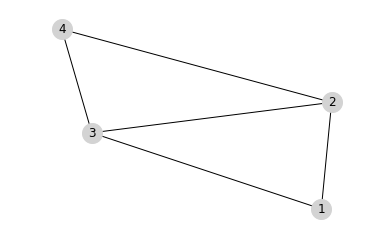

In [16]:
G  = nx.Graph()
# G  = nx.DiGraph()

vlist = [1,2,3,4]
elist = [(1,1), (1,1), (2,1), (1,2), (1,3), (2,3), (2,4), (3,4)]

G.add_nodes_from(vlist)
G.add_edges_from(elist)

nx.draw_networkx(G, node_color='lightgrey', node_size=400)
plt.axis('off')

In [14]:
print('Gの頂点のリスト:', G.nodes())
print('Gの頂点数:', G.number_of_nodes())
print('Gの頂点1に隣接する頂点のリスト:', [v for v in nx.all_neighbors(G,node=1)])

Gの頂点のリスト: [1, 2, 3, 4]
Gの頂点数: 4
Gの頂点1に隣接する頂点のリスト: [1, 2, 3]


# 接続行列

In [21]:
G = nx.MultiGraph()
G.add_edges_from([(1,2), (1,3), (3,1), (2,3), (2,2)])
A = nx.adjacency_matrix(G) # 隣接行列 a(i,j):ノードi,jが隣接しているエッジ本数
M = nx.incidence_matrix(G) # 接続行列 m(i,j):ノードiがエッジjに接続されている場合1

print('A =',A.toarray())
print('M =',M.toarray())

A = [[0 1 2]
 [1 1 1]
 [2 1 0]]
M = [[1. 1. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1.]]


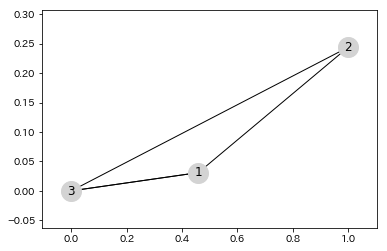

In [22]:
nx.draw_networkx(G, node_color='lightgrey', node_size=400)

# 完全グラフ・2部グラフ・サイクル

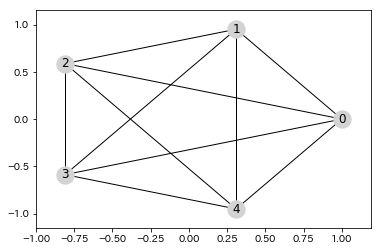

In [25]:
G = nx.complete_graph(5)
#p = nx.spring_layout(G, iterations=100)
p = nx.circular_layout(G)
nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=300)

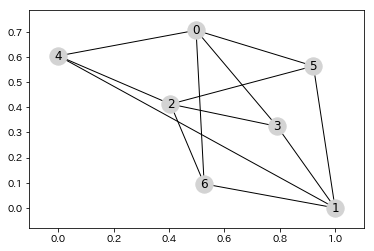

In [27]:
m,n = (3,4)
G = nx.complete_bipartite_graph(m,n)
nx.draw_networkx(G, node_color='lightgrey', node_size=300)

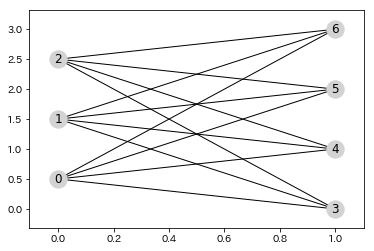

In [29]:
p = {}
for i in range(m):
    p[i] = (0,i+0.5)
for i in range(n):
    p[m+i] = (1,i)
nx.draw_networkx(G, pos=p, node_color='lightgrey', node_size=300)

# P.105 木と最適化

# P.107 最小全域木問題

In [52]:
# Primのアルゴリズム
def prim(G):
    """
    T:最小全域木のエッジ集合
    S:エッジ集合Tに接続しているノード集合
    """
    V = [v for v in G.nodes()]
    n = len(V)
    T = []
    S = [V[0]] # 初期ノードを1つ選択
    # 全ノードがSに含まれるまで反復
    while len(S) < n:
        # エッジのうち片方のノードのみがSに含まれるモノを抽出する
        candidates = []
        for u in S:
            for v,w in G[u].items():
                if not (v in S):
                    candidates.append((u,v,w['weight']))
        # 重みが最小のエッジを選ぶ
        (u,v,w) = min(candidates, key=lambda x:x[2])
        S += [v]
        T += [(u,v)]
    return T

In [53]:
weighted_elist = [
    ('D','G', 195), ('D', 'R', 130), ('D', 'S', 260),
    ('G','R', 195), ('G', 'N', 166), ('R', 'S', 132),
    ('R','M', 114), ('R', 'N', 227), ('M', 'S', 114),
    ('M','P', 114), ('M', 'N', 166), ('N', 'P', 195),
    ('P','S', 114)
]
pos = {'D':(0,15), 'G':(11,19), 'N':(17,12), 'R':(6,9),
       'M':(10,4), 'P':(15, 0), 'S':( 5, 0),}

(-1.7850000000000001, 18.785, -1.995, 20.994999999999997)

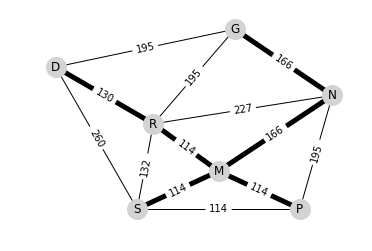

In [59]:
G  = nx.Graph()
G.add_weighted_edges_from(weighted_elist)

# Edgeラベル
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}
# 最小の重みで全ノードをつなぐパスを算出
mst = prim(G)

nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=400)
nx.draw_networkx_edges(G, pos=pos, edgelist=mst, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)

plt.axis('off')

(-1.7850000000000001, 18.785, -2.113033480500367, 21.113033480500366)

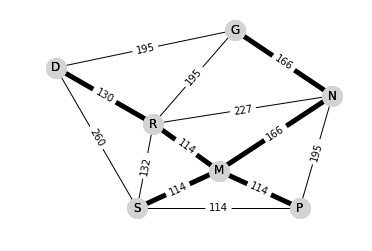

In [61]:
# NetworkXの関数で最小全域木問題を解く
Gmst = nx.minimum_spanning_tree(G=G)# グラフオブジェクトが返ってくる
nx.draw_networkx(G, pos=pos, node_color='lightgrey', node_size=400)
nx.draw_networkx(Gmst, pos=pos, node_color='lightgrey', node_size=400, width=5)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=elbs)
plt.axis('off')

# P.89 列生成法

列生成法(を双対問題の側から見たもの)の枠組み
- Step A 少なくとも実行可能解は得られる程度の制約式を用意し，それで暫定的に線形計画問題を作る.
- Step B その暫定的線形計画問題の最適解を得る. 
- Step C 暫定的問題の最適解を入力定数とみなして，その最適解が満たしていない制約式を探索する. 
    - Step C-1 そのような制約式がないならば，手続きを終了する.
    - Step C-2 そうでないならば，その制約式を暫定的線形計画問題に加え Step B へ移る
    
http://www.orsj.or.jp/archive2/or57-04/or57_4_198.pdf

注釈<br>
この記事では，列生成法の設計と実行をわかりやすく説明するために，<br>
双対問題の観点から，制約式を増やす手法であると説明した.<br>
しかし，双対問題は主問題と一対一に対応するので，実は双対問題を経由する必要はない.<br>
先ほどの手続きを，主問題の観点から書き直すと，変数を生成していることになる.<br>
線形計画問題を行列形式で記述すると，変数の生成は行列の列生成になる.<br>
これが列生成法とよばれる所以であろう.<br>

In [145]:
from pulp import * 
import numpy as np
MEPS = 10e-8

In [148]:
def KPS(capacity, items, costs, weights):
    """
    KnapsackProblemをPuLPで解く
    """
    knapsack = LpProblem(name='kanpsack', sense=LpMaximize)
    # アイテム個数分の設計変数を生成
    x = {j:LpVariable('x'+str(j), lowBound=0, cat=LpBinary) for j in items}
    # 目的関数
    knapsack += lpSum(costs[j]*x[j] for j in items)
    # 制約条件
    knapsack += lpSum(weights[j]*x[j] for j in items) <= capacity, 'weights'
    
    status = LpStatus[knapsack.solve()]
    # 最適解を取得
    obj_opt = value(knapsack.objective)
    var_opt = {j: int(x[j].varValue) for j in items}
    
    return status, obj_opt, var_opt

In [149]:
KPS(capacity, items, costs, weights)

('Optimal', 125.0, {1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

In [238]:
# ビンパッキング問題の生成
def make_binpacking_weights(n_item):

    items = set(range(n_item)) # 10
    np.random.seed(1)

    w = {i:np.random.randint(5,10) for i in items}
    w2 = [w[i] for i in items]

    print(w2)
    
    return w

In [239]:
capacity = 25
w = make_binpacking_weights(n_item=10)

[8, 9, 5, 6, 8, 5, 5, 6, 9, 9]


In [240]:
def binpacking(capacity, w):
    """
    列生成法を用いて、大規模なビンパッキング問題を解く
    """
    # a_iJ:アイテムiがアイテム集合Jに含まれている場合1,そうでない場合0
    # 双対問題を用いて、必要なビン(アイテムの組合せ)を生成
    A, obj_opt_dual = solve_dual_binpacking(capacity, w)

    # 元問題を、列生成法で得られたアイテムの組合せを用いて解く
    m,n = A.shape
    primal = LpProblem(name='P(K)', sense=LpMinimize)

    # x_j = 1, アイテム組合せjを使う場合1
    x = [LpVariable('x'+str(j), lowBound=0, cat='Binary') for j in range(n)]

    # 目的関数(使うアイテムの組合せ数の最小化)
    primal += lpSum(x[j] for j in range(n))
    # 制約条件
    for i in range(m):
        primal += lpDot(A[i], x) >= 1, 'ineq'+str(i)

    primal.solve()

    if value(primal.objective) - obj_opt_dual < 1.0 - MEPS:
        print('Optimal solution found: ')
    else:
        print('Approximated solution found: ')
    
    
    # 結果集計
    K = [j for j in range(n) if x[j].varValue > MEPS]

    result = []
    result_dict = []

    itms =set(range(m))
    for j in K:
        J = {i for i in range(m) if A[i,j] > MEPS and i in itms}
        r = [w[i] for i in J]
        #r = {i:w[i] for i in J}
        itms -= J
        result.append(J)
    
    print('Status =', LpStatus[primal.status])
    print('Objective =', value(primal.objective))
    print('Item allocation =', )
    for i,alloc in enumerate(result):     
        print('i =', i+1, ':', alloc)

In [241]:
def solve_dual_binpacking(capacity, w, verbose=False):
    """
    ビンパッキング問題の双対問題を列生成法を用いて解き、
    得られた制約条件Aと最適解の目的関数値を返す
    """

    m = len(w)
    items = set(range(m))

    # a_iJ:アイテムiがアイテム集合Jに含まれている場合1,そうでない場合0
    # ビンパッキング問題を解くために最低限必要な制約条件式を生成
    A = np. identity(m)

    # 双対問題の部分問題D(K)
    solved = False
    columns = 0
    dual = LpProblem(name='D(K)', sense=LpMaximize)
    y = [LpVariable('y'+str(i), lowBound=0) for i in items]

    # 目的関数
    dual += lpSum(y[i] for i in items)
    # 制約条件
    for j in range(len(A.T)):
        # アイテム集合Jに、各アイテムを1つだけ詰めた集合を作成
        # これが「最適限、ビンパッキング問題が解けるだけの制約式」になる
        dual += lpDot(A.T[j], y) <= 1, 'ineq'+str(j)

    while not solved:
        # 現時点のアイテム集合だけを使うとして
        # ビンパッキング問題の双対問題を部分問題としてを解く
        dual.solve()

        # 双対問題の部分問題D(K)の最適解y*(K)が双対問題Dの最適解y*であるか判定
        # すなわち、「元問題のすべての制約式が満たすべき条件を満たし(=制約条件として成立しうる)、
        # かつ、現時点の最適解y*(K)を入力すると、双対問題の制約式条件を満たさない制約条件」を見つける。
        # そのような制約式が存在しないことがわかれば、現時点の最適解y*(K)は双対問題Dの最適解y*と同じ
        costs = {i:y[i].varValue for i in items}
        weights = {i:w[i] for i in items}
        
        if verbose:
            print('Columns =', columns, end=', ')

        # 今回の問題はたまたま「最悪の制約条件式を見つける=ナップサック問題を解く」のため
        # ナップサック問題を解いて、目的関数値が1以上の答えが見つかった場合、
        # その解solが新たに追加するべき制約条件式a_iJに相当する
        status, val, sol = KPS(capacity, items, costs, weights)

        # 制約条件を満たさない
        if val >= 1.0 + MEPS:
            a = np.array([int(sol[i]) for i in items])
            if verbose:
                print('Generated a =', a)
            
            dual += lpDot(a,y) <= 1, 'ineq'+str(m+columns)
            A = np.hstack((A, a.reshape((-1,1))))
            columns += 1
        else:
            if verbose:
                print('Solved!')
            solved = True

    print('Generated columns =', columns)
    
    return A, value(dual.objective)

In [242]:
%%time
binpacking(capacity, w)

Generated columns = 20
Optimal solution found: 
Status = Optimal
Objective = 3.0
Item allocation =
i = 1 : {0, 1, 4}
i = 2 : {8, 3, 5, 6}
i = 3 : {9, 2, 7}
CPU times: user 95.9 ms, sys: 136 ms, total: 232 ms
Wall time: 566 ms


In [243]:
# 別の定式化によるビンパッキング問題の最適化
# しかし、アイテム数が多くなる(>100)と
# 計算が終わらなくなるので、列生成法のような工夫が必要
def binpacking2(capacity, w):
    n = len(w)
    items =range(n)

    bpprob = LpProblem(name='Binpacking2', sense=LpMinimize)
    # ビンjを使うとき1
    z = [LpVariable('z'+str(j), lowBound=0, cat=LpBinary) for j in items]
    # x_ij:アイテムiをビンjに詰めるとき1
    x = [[LpVariable('x'+str(i)+'_'+str(j), lowBound=0, cat=LpBinary) for j in items] for i in items]

    # 目的関数(使うビン数の最小化)
    bpprob += lpSum(z[i] for i in items)
    # 制約条件
    for i in items:
        # すべてのアイテムはどれかのビンに入っている
        bpprob += lpSum(x[i][j] for j in items) == 1
    for j in items:
        # 利用するすべてのビンについて、ビン内のアイテムの合計容量がcapacity以下
        bpprob += lpSum(x[i][j]*w[i] for i in items) <= capacity*z[j]

    bpprob.solve()

    # 結果集計
    result = []
    for j in items:
        if z[j].varValue > MEPS:
            # r = {i:w[i] for i in items if x[i][j].varValue > MEPS}
            r = {i for i in items if x[i][j].varValue > MEPS}
            result.append(r)
    
    print('Status =', LpStatus[bpprob.status])
    print('Objective =', value(bpprob.objective))
    print('Item allocation =', )
    for i,alloc in enumerate(result):     
        print('i =', i+1, ':', alloc)

In [244]:
%%time
binpacking2(capacity, w)

Status = Optimal
Objective = 3.0
Item allocation =
i = 1 : {2, 3, 6, 7}
i = 2 : {8, 9, 5}
i = 3 : {0, 1, 4}
CPU times: user 9.81 ms, sys: 8.03 ms, total: 17.8 ms
Wall time: 36.8 ms


# 列生成法による計算時間の違い

In [250]:
import time

capacity = 25
n_items = [5, 10, 15, 20, 25, 30, 35, 40] # ,45, 50]

e_times_1 = []
e_times_2 = []

for i, n_item in enumerate(n_items):
    
    w_i = make_binpacking_weights(n_item)
    print ("i=", i+1, "n_item=", n_item)
    print ("")
    
    start_1 = time.time()
    binpacking(capacity, w_i)
    e_time_1 = time.time() - start_1
    e_times_1.append(e_time_1)
    print ("")
    
    start_2 = time.time()
    binpacking2(capacity, w_i)
    e_time_2 = time.time() - start_2
    e_times_2.append(e_time_2)
    print ("")
    
    print ("e_time_1:{0}".format(e_time_1) + "[s]")
    print ("e_time_2:{0}".format(e_time_2) + "[s]")
    print ("/////////")
    print ("")

[8, 9, 5, 6, 8]
i= 1 n_item= 5

Generated columns = 9
Optimal solution found: 
Status = Optimal
Objective = 2.0
Item allocation =
i = 1 : {1, 3, 4}
i = 2 : {0, 2}

Status = Optimal
Objective = 2.0
Item allocation =
i = 1 : {1, 2, 4}
i = 2 : {0, 3}

e_time_1:0.24814510345458984[s]
e_time_2:0.015064001083374023[s]
/////////

[8, 9, 5, 6, 8, 5, 5, 6, 9, 9]
i= 2 n_item= 10

Generated columns = 20
Optimal solution found: 
Status = Optimal
Objective = 3.0
Item allocation =
i = 1 : {0, 1, 4}
i = 2 : {8, 3, 5, 6}
i = 3 : {9, 2, 7}

Status = Optimal
Objective = 3.0
Item allocation =
i = 1 : {2, 3, 6, 7}
i = 2 : {8, 9, 5}
i = 3 : {0, 1, 4}

e_time_1:0.5982820987701416[s]
e_time_2:0.040142059326171875[s]
/////////

[8, 9, 5, 6, 8, 5, 5, 6, 9, 9, 6, 7, 9, 7, 9]
i= 3 n_item= 15

Generated columns = 31
Optimal solution found: 
Status = Optimal
Objective = 5.0
Item allocation =
i = 1 : {2, 5, 6, 7}
i = 2 : {11, 10, 3}
i = 3 : {0, 9, 4}
i = 4 : {12, 13, 14}
i = 5 : {8, 1}

Status = Optimal
Objective =

KeyboardInterrupt: 